# Titanic Data Analysis

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

## Read the Data

In [3]:
data = pd.read_csv('titanic.csv')

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Exploratory Data Analysis

### Visualizing the missing data

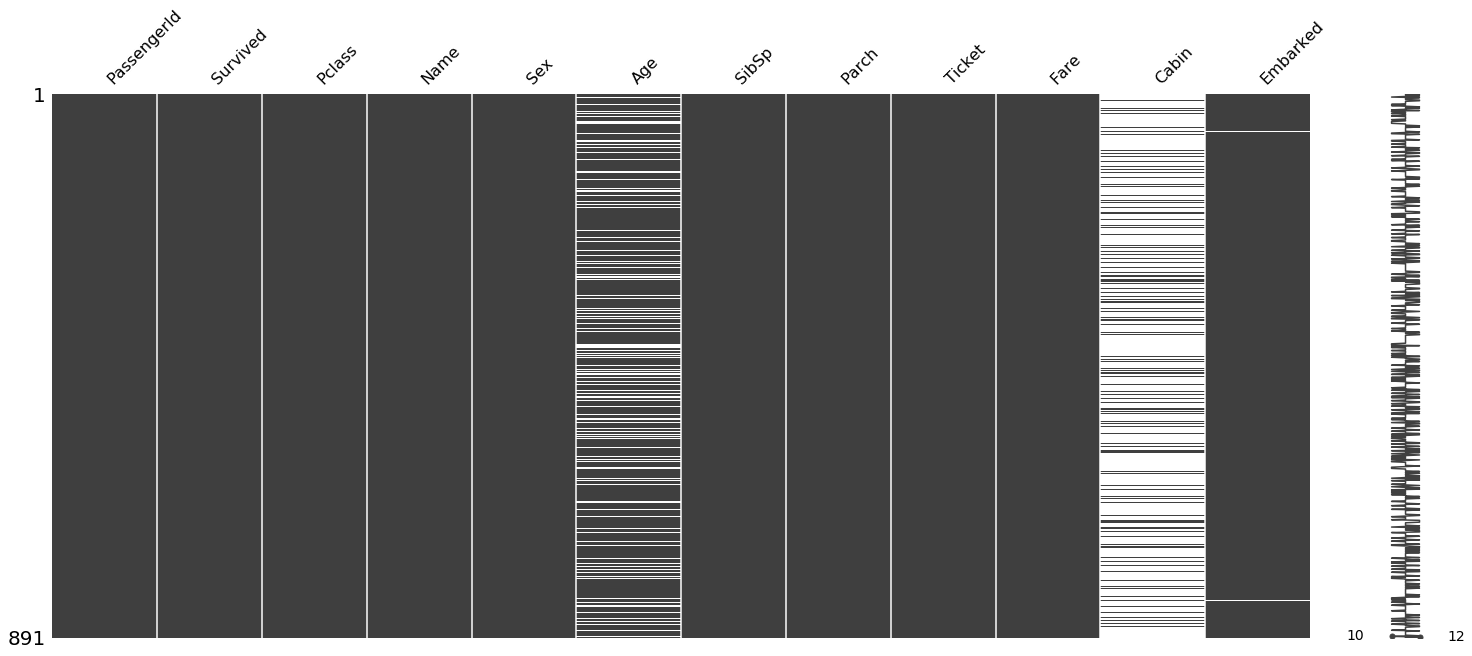

In [9]:
ms.matrix(data)

There are missing values in the columns for Age, Cabin and Embarked

### Visualizing data with Seaborn

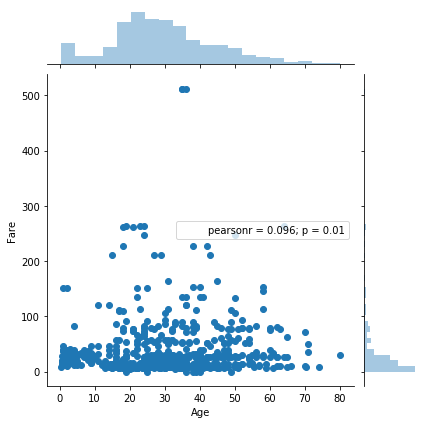

In [10]:
sns.jointplot(x='Age', y='Fare', data=data)

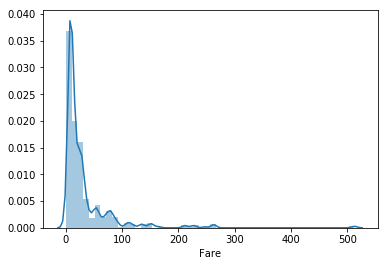

In [11]:
sns.distplot(data['Fare'])

Text(0.5,1,'Correlation Plot')

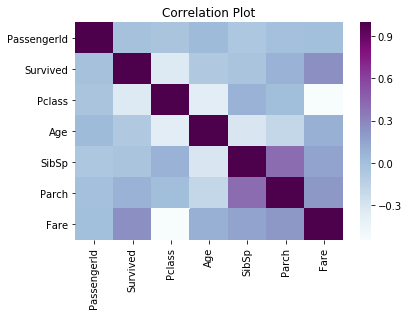

In [12]:
sns.heatmap(data.corr(),cmap='BuPu')
plt.title('Correlation Plot')

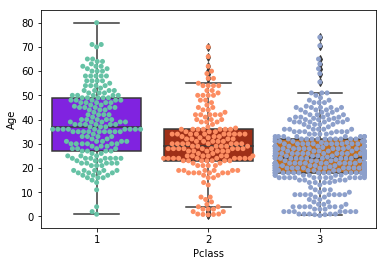

In [13]:
sns.boxplot(x='Pclass',y='Age',data=data, palette='gnuplot', linewidth=1.5)
sns.swarmplot(x="Pclass", y="Age", data=data, palette="Set2")

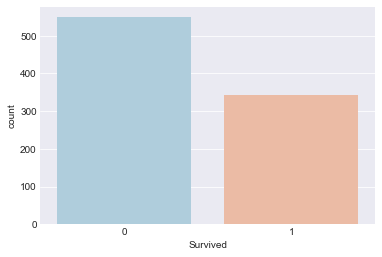

In [14]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=data,palette='RdBu_r')

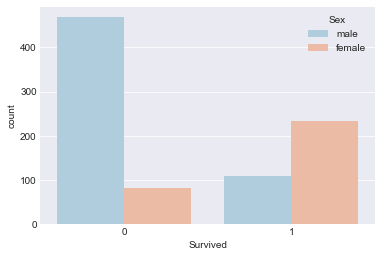

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex', data=data, palette='RdBu_r')

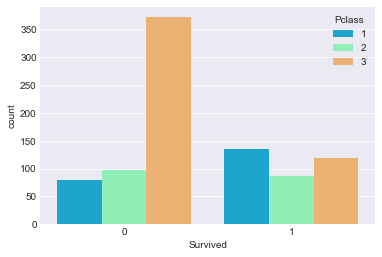

In [16]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data = data,palette='rainbow')

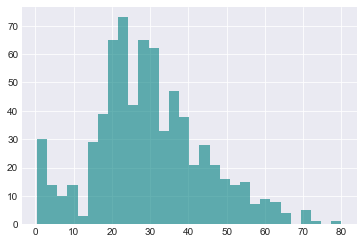

In [17]:
sns.set_style('darkgrid')
data['Age'].hist(bins = 30, color='teal', alpha = 0.6)

### Feature Engineering
Filling missing values in the dataset

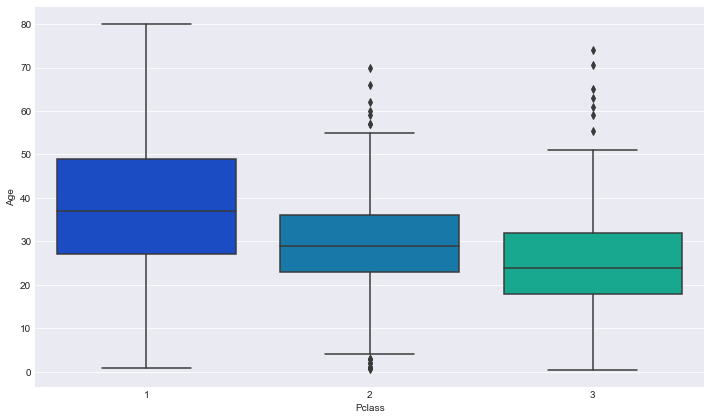

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

The following is a function to impute the age based on the Passenger Class:

In [21]:
def AgeImpute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
data['Age'] = data[['Age','Pclass']].apply(AgeImpute,axis=1)

Observing the Age Column for missing values:

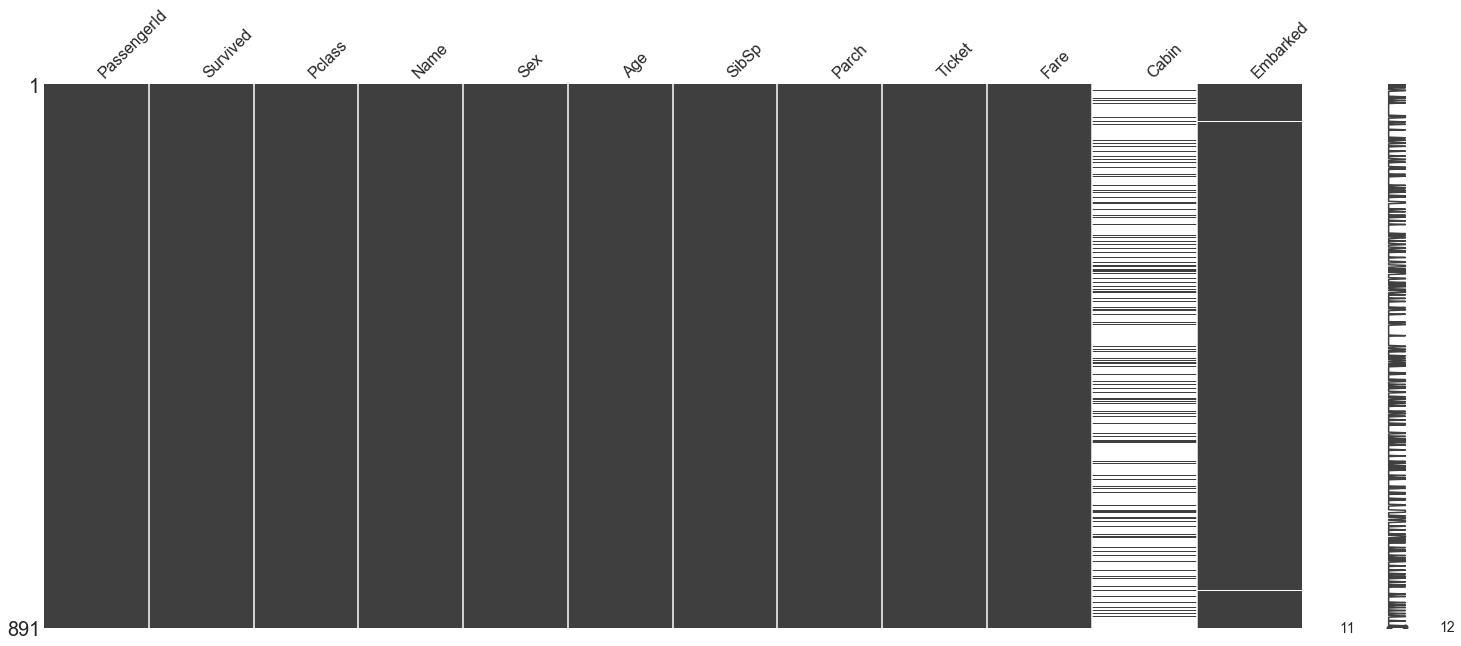

In [23]:
ms.matrix(data)

In [24]:
data.shape

(891, 12)

Cabin column is dropped

In [25]:
data.drop('Cabin', axis = 1,inplace=True)

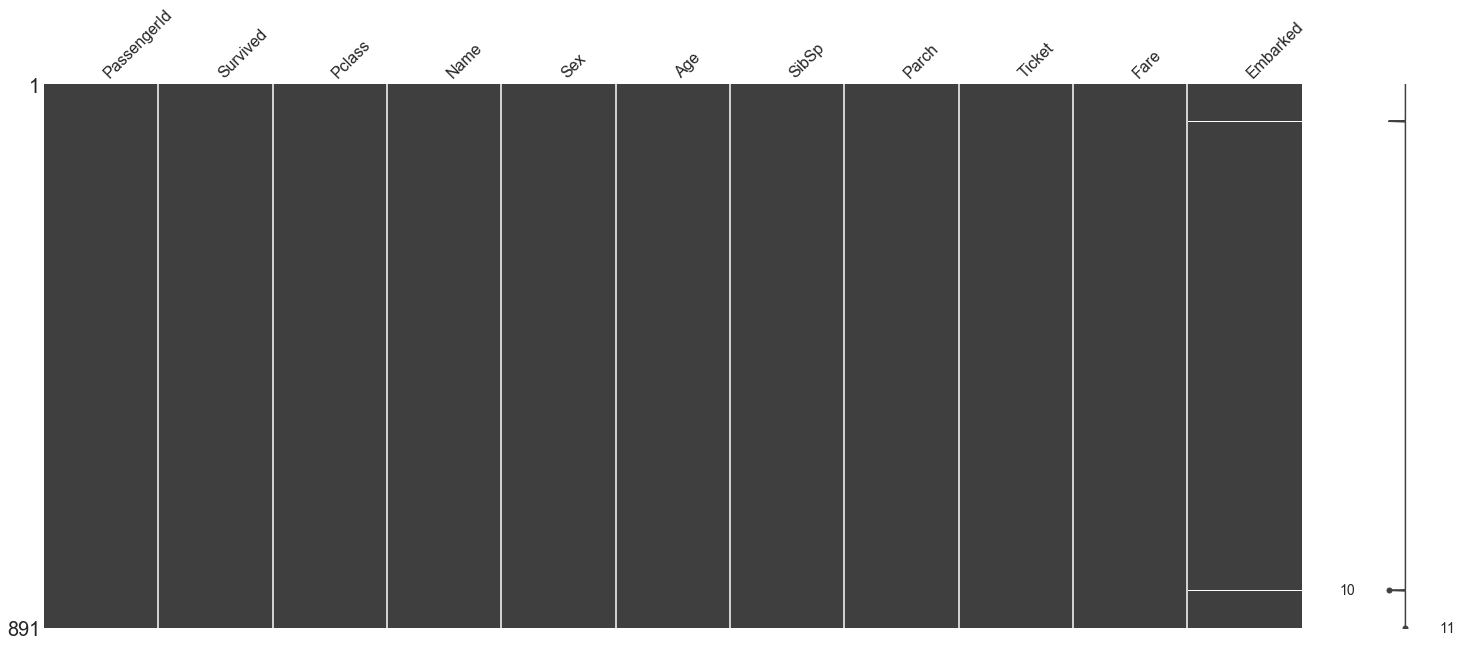

In [26]:
ms.matrix(data)

#### Creating dummy variables.

In [27]:
sex = pd.get_dummies(data['Sex'],drop_first=1)
embark = pd.get_dummies(data['Embarked'],drop_first=1)

In [28]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [29]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
data = pd.concat([data,sex,embark],axis=1)

In [34]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Now the data does not contain any missing values, and is in the numerical format.

### Building the Logistical Regression Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

Building the model

In [39]:
# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predict =  logmodel.predict(X_test)
predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [41]:
y_test

331    0
700    1
748    0
751    1
481    0
845    0
740    1
287    0
669    1
241    1
413    0
636    0
448    1
127    1
630    1
672    0
889    1
500    0
495    0
323    1
614    0
182    0
727    1
109    1
873    0
694    0
138    0
361    0
7      0
548    0
      ..
576    1
281    0
373    0
856    1
756    0
225    0
763    1
479    1
442    0
637    0
84     1
24     0
547    1
417    1
560    0
551    0
605    0
723    0
424    0
89     0
486    1
196    0
83     0
258    1
489    1
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

### Model Evaluation

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score

In [48]:
print(confusion_matrix(y_test, predict))

[[135  19]
 [ 41  73]]


In [49]:
print(precision_score(y_test,predict))

0.79347826087


### F1 Score

In [50]:
print(f1_score(y_test,predict))

0.708737864078


#### Print Classification Report

In [51]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



#### Prediction on the Test data from Kaggle

In [52]:
TestData=pd.read_csv('testData.csv')

In [54]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


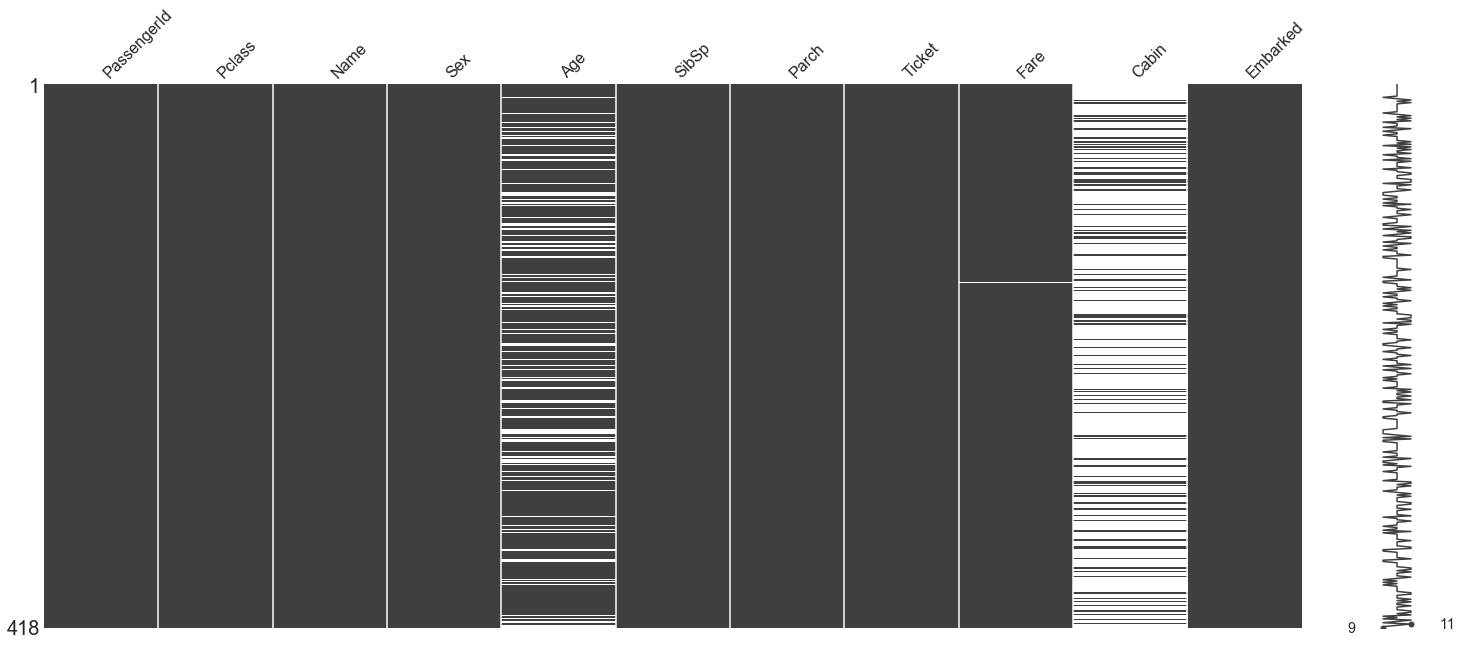

In [55]:
ms.matrix(TestData)

### Similar Data Cleaning and Processing steps are carried out

In [56]:
TestData['Age'] = TestData[['Age','Pclass']].apply(AgeImpute,axis=1)

In [58]:
TestData.drop('Cabin', axis = 1, inplace= True)

In [60]:
TestData.fillna(TestData['Fare'].mean(),inplace=True)

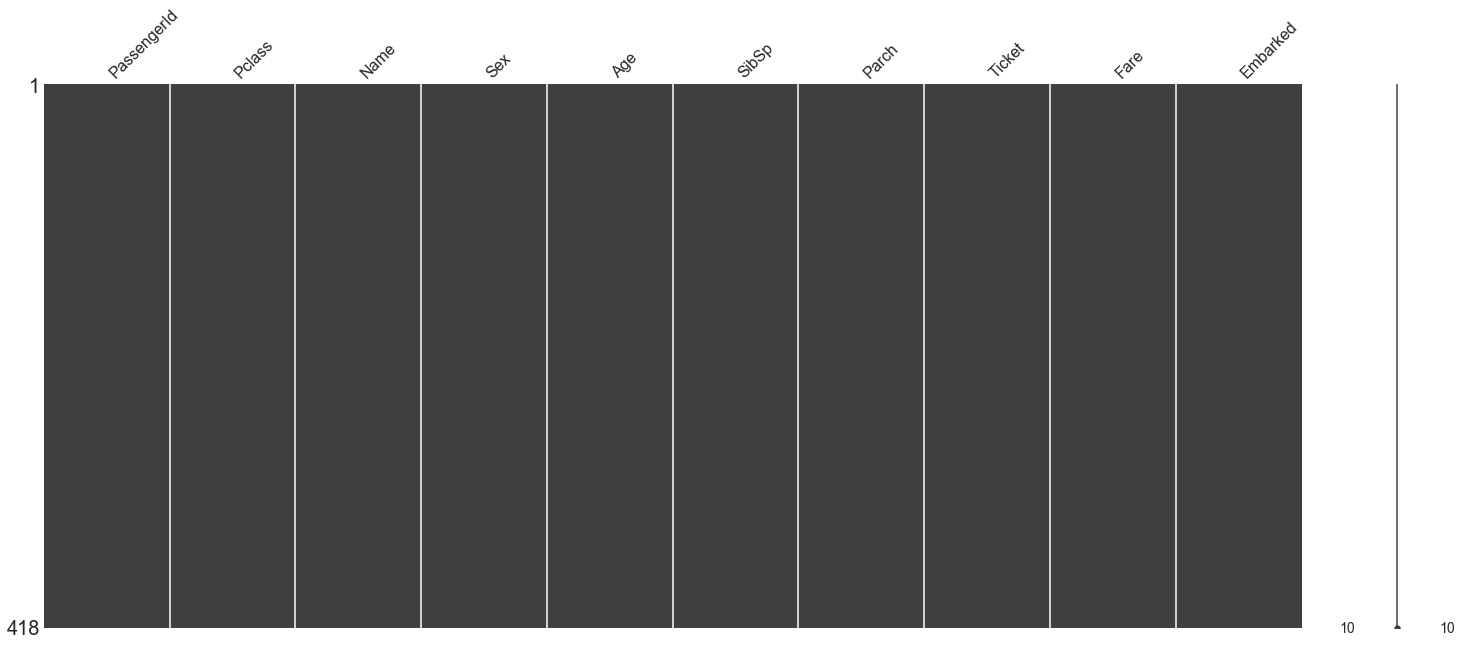

In [61]:
ms.matrix(TestData)

In [62]:
sex = pd.get_dummies(TestData['Sex'], drop_first=True)
embark = pd.get_dummies(TestData['Embarked'], drop_first=True)
TestData.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
Test_Data = pd.concat([TestData,sex,embark],axis=1)

In [64]:
predict1=logmodel.predict(Test_Data)

In [65]:
predict1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [66]:
df1=pd.DataFrame(predict1,columns=['Survived'])

In [67]:
df2=pd.DataFrame(Test_Data['PassengerId'],columns=['PassengerId'])

In [68]:
result = pd.concat([df2,df1],axis=1)

In [70]:
result.to_csv('TitanicResults.csv',index=False)